In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Questions

Does the gender affects on the descition to cancle the service?

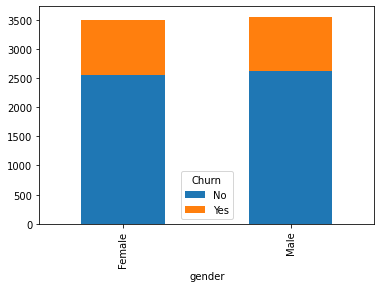

In [6]:
plot = data.groupby(['gender','Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
plot.plot(kind='bar', stacked=True, )

We see no difference between genders when it comes to cancel the service

Senior Citizens tend to cancel more?

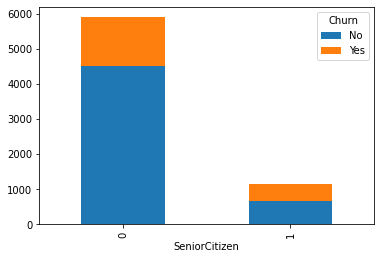

In [7]:
plot = data.groupby(['SeniorCitizen','Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
plot.plot(kind='bar', stacked=True)

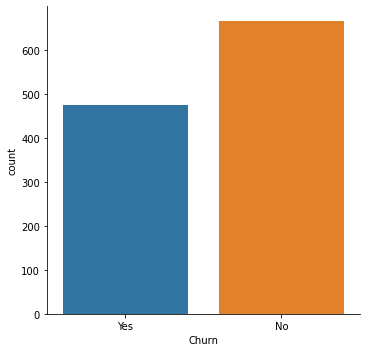

In [8]:
sns.catplot(x='Churn', kind='count',data=data[['SeniorCitizen','Churn']][data.SeniorCitizen == 1])

We can observe that although there are not many Seniors Citizens in the data set, a considerable part of them cancel their contracts. Let's make a deeper analysis here

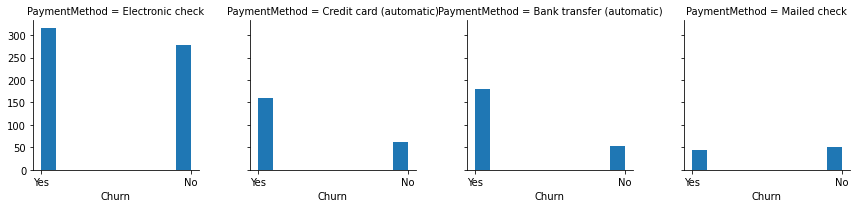

In [9]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='PaymentMethod')
g = g.map(plt.hist, 'Churn')

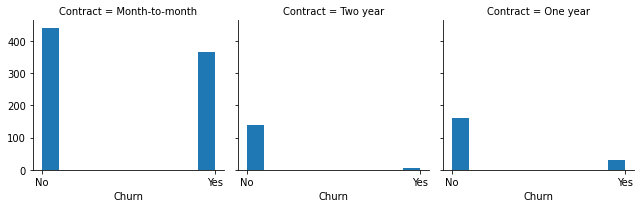

In [10]:
g = sns.FacetGrid(data[data.SeniorCitizen ==1], col='Contract')
g = g.map(plt.hist, 'Churn')

We can already start to think that the feature PaymentMethod and Contract are very powerful to this analysis

Let's see what happend with this two feature but with no Senior Citizens

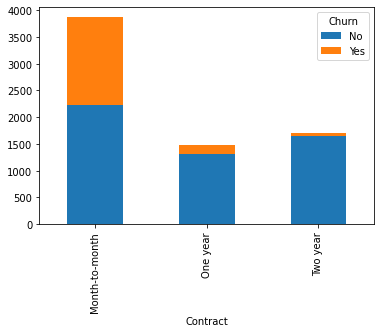

In [11]:
plot = data.groupby(['Contract','Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
plot.plot(kind='bar', stacked=True)

Here is a huge finding, as we can see the most part of the churn is by month-to-month contract customers. This was one of my theories before analyzing the data and came up to be true.

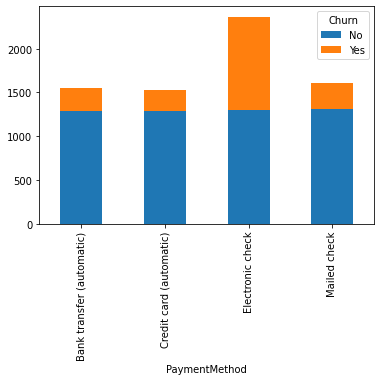

In [12]:
plot = data.groupby(['PaymentMethod','Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
plot.plot(kind='bar', stacked=True)

Another interesting finding here, the electronic check payment method was the one with most considerable churn rate.

In [13]:
rates = pd.DataFrame([], columns=['Method', 'Positive Rate', 'Negative Rate'])

In [14]:
for method in data['PaymentMethod'].value_counts().index.tolist():
    negative_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[0] / data['Churn'].shape[0]
    positive_rate = data[data.PaymentMethod == method]['Churn'].value_counts()[1] / data['Churn'].shape[0]
    rate = {'Method': method, 'Positive Rate': positive_rate, 'Negative Rate': negative_rate}
    rates = rates.append(pd.Series(rate), ignore_index=True)

In [15]:
rates

Method  Positive Rate  Negative Rate
0           Electronic check       0.152066       0.183729
1               Mailed check       0.043731       0.185148
2  Bank transfer (automatic)       0.036632       0.182593
3    Credit card (automatic)       0.032941       0.183161

Make a quick look to the positive rates of the other three, significantly lower than Electronic Check

Next we want to analyze the tenure which stands for how long the clients have been actively paying the service

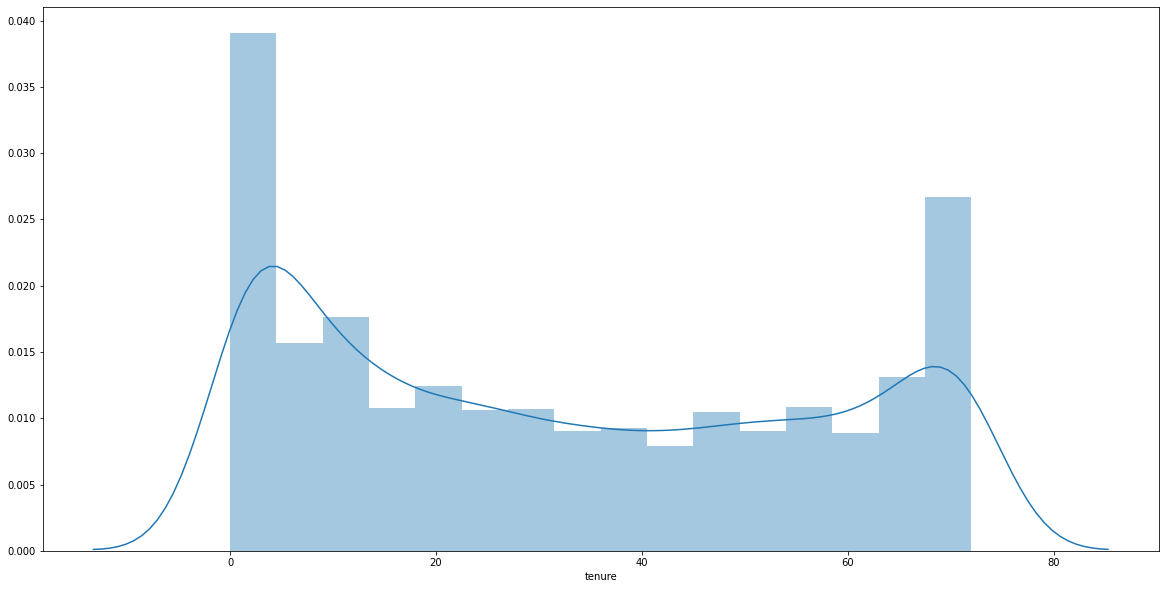

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'])

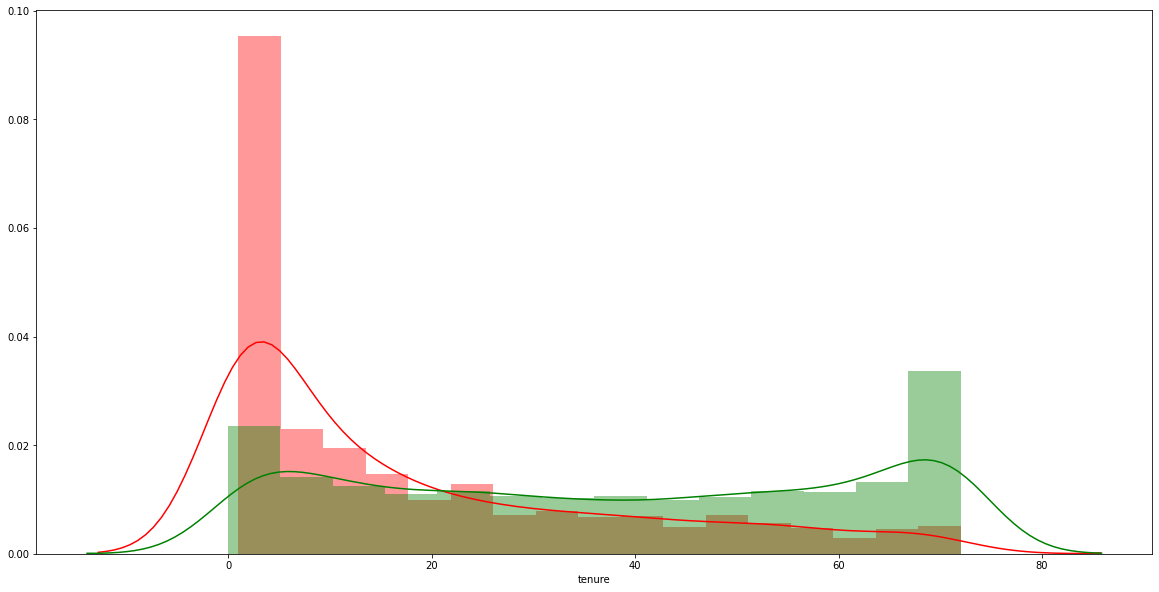

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(data['tenure'][data.Churn == 'Yes'], color='red')
sns.distplot(data['tenure'][data.Churn == 'No'], color='green')

An interesting observation here, the red ones showing the tenure of the clients that churned. And in green the ones that did not. We can see a large amount of clients who churned in the first months and the ones who are clients for more than a year maintaing the service.

Taking a look to the Dependents and Partners of the clients, we can see that people who has not a partner or dependents tend to have a greater churn rate. This could be because of the freedom of not being attached to anyone 

<Figure size 720x720 with 0 Axes>

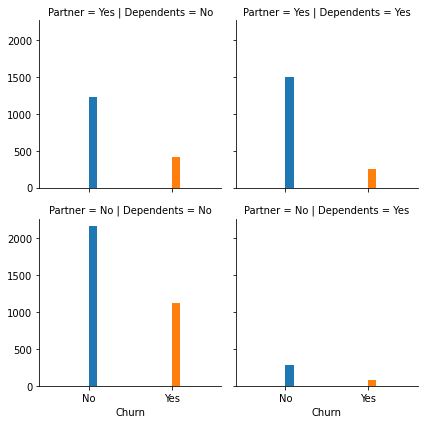

In [18]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(data, col='Dependents', row='Partner', hue='Churn')
g = g.map(plt.hist, 'Churn')

Now another theory I had in mind was the fact that if the client is recieving a paper billing instead of a paperless it would have a greater churn rate but the following plot prove me wrong.

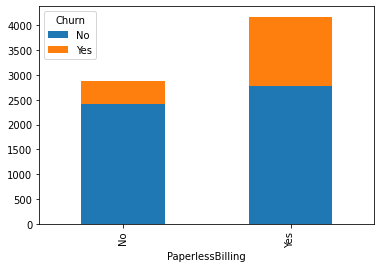

In [19]:
plot = data.groupby(['PaperlessBilling','Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
plot.plot(kind='bar', stacked=True)

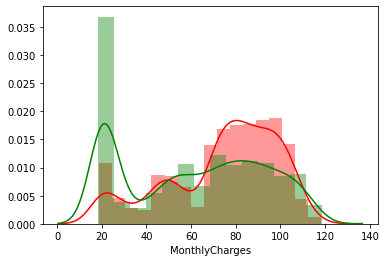

In [20]:
sns.distplot(data['MonthlyCharges'][data.Churn == 'Yes'], color= 'red')
sns.distplot(data['MonthlyCharges'][data.Churn == 'No'], color ='green')

Looking at the monthly charges of the clients we can see that at lower charges, lower the churn rate too but this could be biased because we are not counting how many services the client had contracted.

Now that our basic EDA has ended we are going to create a baseline model for all the features 

We need to map all our data since XGBoost and LightGBM need the features as number input. On the other hand Catboost do not need the features to be numbers.

In [21]:
def map_categorical_ft(data, features):
    map_features = []
    for feature in features:
        mapping = {}
        idx = data[feature].value_counts().index.tolist()
        for index,value in enumerate(idx):
            mapping.update({value: index})  
        data[feature+'_ctg'] = data[feature].map(mapping)
        map_features.append(feature+'_ctg')
    return map_features


In [22]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [23]:
cat_features = map_categorical_ft(data, cat_features)

features = cat_features + ['tenure','MonthlyCharges', 'TotalCharges']

In [24]:
data['TotalCharges'] = (data['tenure'] * data['MonthlyCharges'] ) - data['MonthlyCharges']

In [25]:
data['Churn'] = data['Churn'].map({'Yes': 1,
                                   'No': 0})

## Creating a baseline model

Since this is a classification problem, we are going to train three different algorithms and see the performance of each one. Catboost, XGBoost and LightGBM

### Catboost Baseline model

In [26]:
from catboost import CatBoostClassifier
from catboost import Pool

cb_clf = CatBoostClassifier(task_type = 'GPU', devices = '0:1',)
#training_pool = Pool(X_train[features], y_train, cat_features=cat_features)

### XGBoost

In [27]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

### LightGBM 

In [28]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()

We are going to create a function that takes as input the models, data, features and the % of train/test and it will return Metrics, ROC_AUC Curve and plot the confusion matrix of each one.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
def train_bl_models(models,data,features,pred_column,percentage_of_split,params='base'):
    
    #First thing is to divide the data 
    splits = {}
    
    X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != pred_column], data[pred_column], 
                                                        test_size=percentage_of_split)
    X_train =X_train[features]
    X_test = X_test[features]
    #Create Df for append metrics
    
    splits.update({'X_train': X_train,
                   'X_test': X_test,
                   'y_train': y_train,
                   'y_test': y_test})
    
    metrics = pd.DataFrame([], columns=['Accuracy','Precision','Recall','F1-Score','ROC_AUC Score',
                                       'Log_loss', 'FPR', 'TPR', 'THR','pred','y_test'])
    
    
    if params =='base':
        
        for model in models:
            #train model 
            print('Training model')
            model.fit(X_train, y_train)
            print('Trained finishedn now predicting')
            prediction = model.predict(X_test)
            print(len(prediction))
            print('Starting to get the metrics')
            
            model_stats = {}
            
            ### report:
            model_stats.update({'Accuracy': classification_report(y_test, prediction, output_dict=True)['accuracy']})
            
            ## others metrics:
            
            model_stats.update({'Precision': classification_report(y_test, prediction, output_dict=True)['macro avg']['precision'],
                               'Recall': classification_report(y_test, prediction, output_dict=True)['macro avg']['recall'],
                               'F1-Score': classification_report(y_test, prediction, output_dict=True)['macro avg']['f1-score']})
            
            ## get_roc_auc_score
            
            model_stats.update({'ROC_AUC Score': roc_auc_score(y_test,prediction)})
            
            ## add roc_curve for plotting later
            
            fpr, tpr, th = roc_curve(y_test, prediction, pos_label=1)
            
            model_stats.update({'FPR': fpr, 'TPR': tpr,'THR': th})
            ### apending stuff for later analysis
            
            model_stats['pred'] =  prediction
            
            ##append to df
            metrics = metrics.append(model_stats, ignore_index=True)
        
        return metrics, splits
    

Here we made a function that trains all the basics models and retrieve the metrics of each one for comparisson. This is for a out-of-the-box training comparisson.

In [31]:
metrics, splits = train_bl_models([cb_clf,xgb_clf,lgb_clf],data,features,'Churn', 0.2)

Training model
Learning rate set to 0.030653
0:	learn: 0.6710468	total: 40.5ms	remaining: 40.5s
1:	learn: 0.6507099	total: 66.7ms	remaining: 33.3s
2:	learn: 0.6334104	total: 78.9ms	remaining: 26.2s
3:	learn: 0.6159907	total: 105ms	remaining: 26.2s
4:	learn: 0.6012496	total: 130ms	remaining: 25.9s
5:	learn: 0.5874431	total: 156ms	remaining: 25.9s
6:	learn: 0.5742280	total: 182ms	remaining: 25.9s
7:	learn: 0.5623367	total: 199ms	remaining: 24.7s
8:	learn: 0.5516708	total: 224ms	remaining: 24.7s
9:	learn: 0.5413852	total: 250ms	remaining: 24.8s
10:	learn: 0.5335728	total: 263ms	remaining: 23.7s
11:	learn: 0.5255289	total: 277ms	remaining: 22.8s
12:	learn: 0.5176049	total: 300ms	remaining: 22.8s
13:	learn: 0.5113913	total: 322ms	remaining: 22.7s
14:	learn: 0.5059141	total: 334ms	remaining: 21.9s
15:	learn: 0.4998063	total: 355ms	remaining: 21.8s
16:	learn: 0.4937424	total: 371ms	remaining: 21.4s
17:	learn: 0.4894299	total: 380ms	remaining: 20.8s
18:	learn: 0.4843737	total: 401ms	remaining:

161:	learn: 0.3937601	total: 2.96s	remaining: 15.3s
162:	learn: 0.3937496	total: 2.97s	remaining: 15.3s
163:	learn: 0.3935147	total: 3s	remaining: 15.3s
164:	learn: 0.3935118	total: 3s	remaining: 15.2s
165:	learn: 0.3934048	total: 3.03s	remaining: 15.2s
166:	learn: 0.3933846	total: 3.04s	remaining: 15.2s
167:	learn: 0.3933794	total: 3.05s	remaining: 15.1s
168:	learn: 0.3933161	total: 3.07s	remaining: 15.1s
169:	learn: 0.3932510	total: 3.09s	remaining: 15.1s
170:	learn: 0.3929451	total: 3.11s	remaining: 15.1s
171:	learn: 0.3929423	total: 3.12s	remaining: 15s
172:	learn: 0.3929007	total: 3.14s	remaining: 15s
173:	learn: 0.3928204	total: 3.15s	remaining: 15s
174:	learn: 0.3927771	total: 3.17s	remaining: 14.9s
175:	learn: 0.3927752	total: 3.17s	remaining: 14.9s
176:	learn: 0.3927673	total: 3.18s	remaining: 14.8s
177:	learn: 0.3927071	total: 3.21s	remaining: 14.8s
178:	learn: 0.3926937	total: 3.23s	remaining: 14.8s
179:	learn: 0.3924932	total: 3.25s	remaining: 14.8s
180:	learn: 0.3924856	to

327:	learn: 0.3872562	total: 5.67s	remaining: 11.6s
328:	learn: 0.3872179	total: 5.69s	remaining: 11.6s
329:	learn: 0.3872131	total: 5.7s	remaining: 11.6s
330:	learn: 0.3872121	total: 5.71s	remaining: 11.5s
331:	learn: 0.3870349	total: 5.73s	remaining: 11.5s
332:	learn: 0.3870348	total: 5.74s	remaining: 11.5s
333:	learn: 0.3870347	total: 5.75s	remaining: 11.5s
334:	learn: 0.3870305	total: 5.77s	remaining: 11.5s
335:	learn: 0.3870305	total: 5.79s	remaining: 11.4s
336:	learn: 0.3870039	total: 5.84s	remaining: 11.5s
337:	learn: 0.3869957	total: 5.85s	remaining: 11.5s
338:	learn: 0.3869804	total: 5.89s	remaining: 11.5s
339:	learn: 0.3869797	total: 5.91s	remaining: 11.5s
340:	learn: 0.3869797	total: 5.92s	remaining: 11.4s
341:	learn: 0.3869788	total: 5.93s	remaining: 11.4s
342:	learn: 0.3869788	total: 5.96s	remaining: 11.4s
343:	learn: 0.3869677	total: 5.98s	remaining: 11.4s
344:	learn: 0.3869661	total: 6s	remaining: 11.4s
345:	learn: 0.3868824	total: 6.02s	remaining: 11.4s
346:	learn: 0.38

494:	learn: 0.3824913	total: 8.19s	remaining: 8.35s
495:	learn: 0.3824285	total: 8.21s	remaining: 8.34s
496:	learn: 0.3824284	total: 8.21s	remaining: 8.31s
497:	learn: 0.3824284	total: 8.22s	remaining: 8.29s
498:	learn: 0.3824045	total: 8.23s	remaining: 8.27s
499:	learn: 0.3824031	total: 8.24s	remaining: 8.24s
500:	learn: 0.3824030	total: 8.26s	remaining: 8.22s
501:	learn: 0.3823582	total: 8.28s	remaining: 8.21s
502:	learn: 0.3823356	total: 8.3s	remaining: 8.2s
503:	learn: 0.3823233	total: 8.32s	remaining: 8.19s
504:	learn: 0.3823232	total: 8.33s	remaining: 8.16s
505:	learn: 0.3822394	total: 8.35s	remaining: 8.15s
506:	learn: 0.3822391	total: 8.36s	remaining: 8.13s
507:	learn: 0.3822390	total: 8.37s	remaining: 8.11s
508:	learn: 0.3822391	total: 8.38s	remaining: 8.08s
509:	learn: 0.3822390	total: 8.39s	remaining: 8.06s
510:	learn: 0.3822390	total: 8.4s	remaining: 8.04s
511:	learn: 0.3822291	total: 8.41s	remaining: 8.02s
512:	learn: 0.3821752	total: 8.43s	remaining: 8.01s
513:	learn: 0.3

654:	learn: 0.3785986	total: 10.9s	remaining: 5.73s
655:	learn: 0.3785815	total: 10.9s	remaining: 5.71s
656:	learn: 0.3785815	total: 10.9s	remaining: 5.69s
657:	learn: 0.3785811	total: 10.9s	remaining: 5.67s
658:	learn: 0.3785809	total: 10.9s	remaining: 5.65s
659:	learn: 0.3784747	total: 10.9s	remaining: 5.63s
660:	learn: 0.3784743	total: 10.9s	remaining: 5.62s
661:	learn: 0.3784282	total: 11s	remaining: 5.6s
662:	learn: 0.3784097	total: 11s	remaining: 5.59s
663:	learn: 0.3784072	total: 11s	remaining: 5.57s
664:	learn: 0.3783472	total: 11s	remaining: 5.55s
665:	learn: 0.3783045	total: 11s	remaining: 5.54s
666:	learn: 0.3782670	total: 11.1s	remaining: 5.52s
667:	learn: 0.3782629	total: 11.1s	remaining: 5.51s
668:	learn: 0.3782628	total: 11.1s	remaining: 5.49s
669:	learn: 0.3782117	total: 11.1s	remaining: 5.47s
670:	learn: 0.3782117	total: 11.1s	remaining: 5.46s
671:	learn: 0.3781775	total: 11.1s	remaining: 5.44s
672:	learn: 0.3780748	total: 11.2s	remaining: 5.43s
673:	learn: 0.3780748	t

823:	learn: 0.3751197	total: 13.2s	remaining: 2.81s
824:	learn: 0.3751195	total: 13.2s	remaining: 2.79s
825:	learn: 0.3751093	total: 13.2s	remaining: 2.78s
826:	learn: 0.3750934	total: 13.2s	remaining: 2.77s
827:	learn: 0.3750933	total: 13.2s	remaining: 2.75s
828:	learn: 0.3750887	total: 13.2s	remaining: 2.73s
829:	learn: 0.3750765	total: 13.3s	remaining: 2.72s
830:	learn: 0.3750709	total: 13.3s	remaining: 2.7s
831:	learn: 0.3750488	total: 13.3s	remaining: 2.68s
832:	learn: 0.3750486	total: 13.3s	remaining: 2.67s
833:	learn: 0.3749424	total: 13.3s	remaining: 2.65s
834:	learn: 0.3749032	total: 13.3s	remaining: 2.64s
835:	learn: 0.3749031	total: 13.4s	remaining: 2.62s
836:	learn: 0.3749031	total: 13.4s	remaining: 2.6s
837:	learn: 0.3747801	total: 13.4s	remaining: 2.59s
838:	learn: 0.3747801	total: 13.4s	remaining: 2.57s
839:	learn: 0.3747751	total: 13.4s	remaining: 2.55s
840:	learn: 0.3747273	total: 13.4s	remaining: 2.54s
841:	learn: 0.3747191	total: 13.4s	remaining: 2.52s
842:	learn: 0.

993:	learn: 0.3721123	total: 15.9s	remaining: 96ms
994:	learn: 0.3721122	total: 15.9s	remaining: 80ms
995:	learn: 0.3721122	total: 15.9s	remaining: 63.9ms
996:	learn: 0.3721122	total: 15.9s	remaining: 47.9ms
997:	learn: 0.3721121	total: 15.9s	remaining: 31.9ms
998:	learn: 0.3720797	total: 16s	remaining: 16ms
999:	learn: 0.3720793	total: 16s	remaining: 0us
Trained finishedn now predicting
1409
Starting to get the metrics
Training model
Trained finishedn now predicting
1409
Starting to get the metrics
Training model
Trained finishedn now predicting
1409
Starting to get the metrics


In [36]:
metrics

Accuracy  Precision    Recall  F1-Score  ROC_AUC Score  Log_loss  \
0  0.804826   0.746355  0.725196  0.734279       0.725196       NaN   
1  0.789212   0.724085  0.703928  0.712448       0.703928       NaN   
2  0.804826   0.746045  0.727881  0.735851       0.727881       NaN   

                               FPR                             TPR        THR  \
0  [0.0, 0.11004784688995216, 1.0]  [0.0, 0.5604395604395604, 1.0]  [2, 1, 0]   
1  [0.0, 0.11961722488038277, 1.0]  [0.0, 0.5274725274725275, 1.0]  [2, 1, 0]   
2  [0.0, 0.11291866028708133, 1.0]  [0.0, 0.5686813186813187, 1.0]  [2, 1, 0]   

                                                pred  y_test  
0  [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, ...     NaN  
1  [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...     NaN  
2  [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, ...     NaN

As we can see in the df of metrics Catboost was the one with the better metrics, followed by LightGBM and last one XGBoost

### Confusion Matrix

After training first we are going to plot each confusion matrix and look for findings

In [32]:
def create_cm(y_test, y_pred):
    data = {'y_Actual': y_test,
       'y_Pred': y_pred}
    df_cm = pd.DataFrame(data, columns=['y_Actual','y_Pred'])
    
    confusion_matrix = pd.crosstab(df_cm['y_Actual'], df_cm['y_Pred'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, fmt='d')


#### Catboost

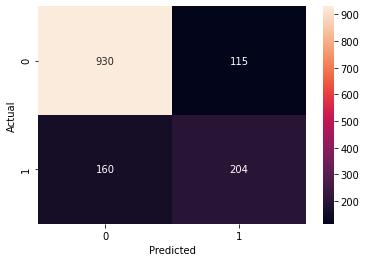

In [33]:
create_cm(splits['y_test'], metrics['pred'].loc[0])

#### XGBoost

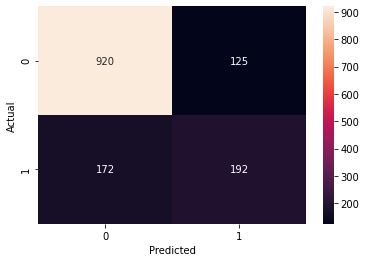

In [34]:
create_cm(splits['y_test'], metrics['pred'].loc[1])

#### LightGBM

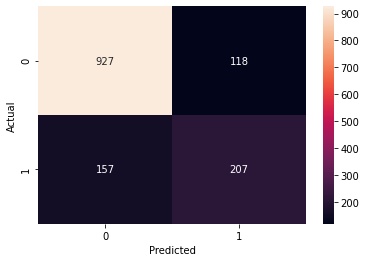

In [35]:
create_cm(splits['y_test'], metrics['pred'].loc[2])

We are going to take a look at the False Negatives and the False Positives. Okay a False Negative here would be a client that was predicted as No Churn when actually he Churn the service. And the False positive when the Prediction tell us that the client churn but actually he don't. 
My point of view here depends on the strategy that the company would like to apply. For example if we want to predict if a client is going to churn to try to keep the client offering some kind of promotion or disscount. We need to look to both rates, False Positives and False negatives because if we only focus on lower the False Positives and we don't lower the False negatives we will be spending money in an effort to keep clients when they don't even consider the churn, sure this could be also seen as an "inversion" for the loyality of the clients but we have to keep in minds this kind of strategies 

So after the last statement, we can see that Catboost is the one that performs better in both of this metrics followed by LightGBM and last one XGBoost

### Roc cuvers

In [37]:
def plot_roc_curves(fprs, tprs):
    #set up plot
    plt.style.use('seaborn')
    colors = ['orange','green','blue','red']
    for model in range(0,len(fprs)):
        plt.plot(fprs[model], tprs[model], linestyle='--', color=colors[model],
                 label=f"Model {model}")
        
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()
    
    

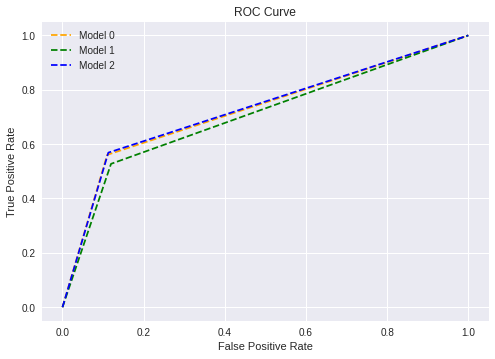

In [38]:
plot_roc_curves(metrics['FPR'].tolist(), metrics['TPR'].tolist())

## Hyper Tuning Parameters

Okay now that we already test the models without even do a Grid Search or a Cross Validation we continue our comparisson by perfoming hyper tunning on each of the models to get the better score we can.

### Catboost HT

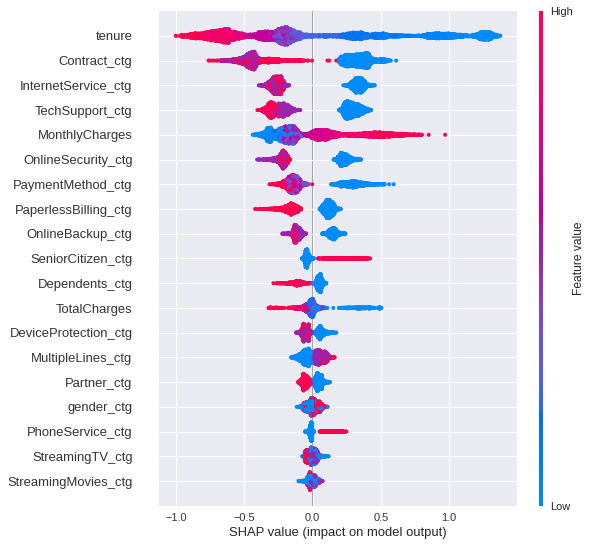

In [72]:
import shap
shap.initjs()
shap.summary_plot(shap_values, splits['X_train'])

In [83]:
features = [x for x in features if x not in ['StreamingTV_ctg','StreamingMovies_ctg','gender_ctg','MultipleLines_ctg','Device_Protection_ctg','OnlineBackup_ctg'] ]

In [84]:
features

['SeniorCitizen_ctg',
 'Partner_ctg',
 'Dependents_ctg',
 'PhoneService_ctg',
 'InternetService_ctg',
 'OnlineSecurity_ctg',
 'DeviceProtection_ctg',
 'TechSupport_ctg',
 'Contract_ctg',
 'PaperlessBilling_ctg',
 'PaymentMethod_ctg',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [96]:
cb_clf = CatBoostClassifier(task_type = 'GPU',
                            learning_rate=0.01,
                            devices = '0:1',
                            eval_metric='AUC',
                            custom_metric='Logloss',
                            iterations=5000,
                            depth=3,
                            random_seed = 1,
                            od_type='Iter',
                            od_wait=500
                            )
training_pool = Pool(splits['X_train'][features], splits['y_train'])

In [97]:
cb_clf.fit(training_pool, eval_set=(splits['X_test'][features],splits['y_test']),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8067106	test: 0.7996858	best: 0.7996858 (0)	total: 10.8ms	remaining: 54.2s
1:	learn: 0.8229947	test: 0.8189416	best: 0.8189416 (1)	total: 21.3ms	remaining: 53.3s
2:	learn: 0.8292496	test: 0.8242192	best: 0.8242192 (2)	total: 33.1ms	remaining: 55.1s
3:	learn: 0.8344698	test: 0.8295875	best: 0.8295875 (3)	total: 44.8ms	remaining: 55.9s
4:	learn: 0.8356501	test: 0.8293417	best: 0.8295875 (3)	total: 56.7ms	remaining: 56.6s
5:	learn: 0.8355375	test: 0.8292721	best: 0.8295875 (3)	total: 68.8ms	remaining: 57.3s
6:	learn: 0.8363802	test: 0.8300423	best: 0.8300423 (6)	total: 79.6ms	remaining: 56.8s
7:	learn: 0.8378016	test: 0.8314343	best: 0.8314343 (7)	total: 90.8ms	remaining: 56.6s
8:	learn: 0.8376880	test: 0.8312924	best: 0.8314343 (7)	total: 102ms	remaining: 56.8s
9:	learn: 0.8382382	test: 0.8314790	best: 0.8314790 (9)	total: 116ms	remaining: 57.8s
10:	learn: 0.8377947	test: 0.8311833	best: 0.8314790 (9)	total: 128ms	remaining: 57.9s
11:	learn: 0.8383824	test: 0.8318511	best: 0.

103:	learn: 0.8465964	test: 0.8364044	best: 0.8364070 (102)	total: 1.23s	remaining: 58.1s
104:	learn: 0.8466364	test: 0.8363912	best: 0.8364070 (102)	total: 1.26s	remaining: 58.6s
105:	learn: 0.8467264	test: 0.8365148	best: 0.8365148 (105)	total: 1.27s	remaining: 58.5s
106:	learn: 0.8467313	test: 0.8365687	best: 0.8365687 (106)	total: 1.29s	remaining: 59s
107:	learn: 0.8467249	test: 0.8364741	best: 0.8365687 (106)	total: 1.3s	remaining: 58.9s
108:	learn: 0.8467696	test: 0.8363084	best: 0.8365687 (106)	total: 1.31s	remaining: 58.8s
109:	learn: 0.8468122	test: 0.8364425	best: 0.8365687 (106)	total: 1.32s	remaining: 58.7s
110:	learn: 0.8468688	test: 0.8364136	best: 0.8365687 (106)	total: 1.33s	remaining: 58.6s
111:	learn: 0.8469844	test: 0.8364372	best: 0.8365687 (106)	total: 1.34s	remaining: 58.5s
112:	learn: 0.8470185	test: 0.8365345	best: 0.8365687 (106)	total: 1.35s	remaining: 58.5s
113:	learn: 0.8470721	test: 0.8366975	best: 0.8366975 (113)	total: 1.36s	remaining: 58.5s
114:	learn: 0

195:	learn: 0.8493813	test: 0.8394172	best: 0.8394172 (195)	total: 2.25s	remaining: 55.3s
196:	learn: 0.8493958	test: 0.8393646	best: 0.8394172 (195)	total: 2.27s	remaining: 55.2s
197:	learn: 0.8494526	test: 0.8393830	best: 0.8394172 (195)	total: 2.27s	remaining: 55.2s
198:	learn: 0.8494946	test: 0.8393935	best: 0.8394172 (195)	total: 2.29s	remaining: 55.1s
199:	learn: 0.8495632	test: 0.8394487	best: 0.8394487 (199)	total: 2.3s	remaining: 55.1s
200:	learn: 0.8495570	test: 0.8394855	best: 0.8394855 (200)	total: 2.31s	remaining: 55.1s
201:	learn: 0.8496283	test: 0.8396511	best: 0.8396511 (201)	total: 2.32s	remaining: 55.1s
202:	learn: 0.8496858	test: 0.8396853	best: 0.8396853 (202)	total: 2.33s	remaining: 55.1s
203:	learn: 0.8496698	test: 0.8396222	best: 0.8396853 (202)	total: 2.34s	remaining: 55s
204:	learn: 0.8497291	test: 0.8396459	best: 0.8396853 (202)	total: 2.35s	remaining: 55s
205:	learn: 0.8497362	test: 0.8396433	best: 0.8396853 (202)	total: 2.36s	remaining: 55s
206:	learn: 0.849

291:	learn: 0.8521369	test: 0.8413153	best: 0.8413153 (291)	total: 3.28s	remaining: 52.9s
292:	learn: 0.8521318	test: 0.8412969	best: 0.8413153 (291)	total: 3.29s	remaining: 52.9s
293:	learn: 0.8521663	test: 0.8413047	best: 0.8413153 (291)	total: 3.3s	remaining: 52.9s
294:	learn: 0.8521985	test: 0.8413310	best: 0.8413310 (294)	total: 3.31s	remaining: 52.9s
295:	learn: 0.8521975	test: 0.8413100	best: 0.8413310 (294)	total: 3.32s	remaining: 52.8s
296:	learn: 0.8522152	test: 0.8413074	best: 0.8413310 (294)	total: 3.33s	remaining: 52.8s
297:	learn: 0.8522387	test: 0.8413126	best: 0.8413310 (294)	total: 3.35s	remaining: 52.8s
298:	learn: 0.8522947	test: 0.8413810	best: 0.8413810 (298)	total: 3.36s	remaining: 52.8s
299:	learn: 0.8523239	test: 0.8413836	best: 0.8413836 (299)	total: 3.37s	remaining: 52.8s
300:	learn: 0.8523288	test: 0.8413652	best: 0.8413836 (299)	total: 3.38s	remaining: 52.8s
301:	learn: 0.8523203	test: 0.8413547	best: 0.8413836 (299)	total: 3.39s	remaining: 52.8s
302:	learn:

386:	learn: 0.8537957	test: 0.8421670	best: 0.8421802 (372)	total: 4.3s	remaining: 51.3s
387:	learn: 0.8537898	test: 0.8421355	best: 0.8421802 (372)	total: 4.31s	remaining: 51.3s
388:	learn: 0.8537957	test: 0.8421302	best: 0.8421802 (372)	total: 4.32s	remaining: 51.2s
389:	learn: 0.8538080	test: 0.8421460	best: 0.8421802 (372)	total: 4.33s	remaining: 51.2s
390:	learn: 0.8538086	test: 0.8421618	best: 0.8421802 (372)	total: 4.35s	remaining: 51.3s
391:	learn: 0.8538214	test: 0.8421355	best: 0.8421802 (372)	total: 4.36s	remaining: 51.2s
392:	learn: 0.8538505	test: 0.8421618	best: 0.8421802 (372)	total: 4.37s	remaining: 51.2s
393:	learn: 0.8538831	test: 0.8421802	best: 0.8421802 (372)	total: 4.38s	remaining: 51.2s
394:	learn: 0.8539018	test: 0.8421828	best: 0.8421828 (394)	total: 4.39s	remaining: 51.2s
395:	learn: 0.8539112	test: 0.8421749	best: 0.8421828 (394)	total: 4.4s	remaining: 51.2s
396:	learn: 0.8539364	test: 0.8421749	best: 0.8421828 (394)	total: 4.41s	remaining: 51.2s
397:	learn: 

494:	learn: 0.8550026	test: 0.8425614	best: 0.8425640 (493)	total: 5.53s	remaining: 50.3s
495:	learn: 0.8550231	test: 0.8425719	best: 0.8425719 (495)	total: 5.54s	remaining: 50.3s
496:	learn: 0.8550315	test: 0.8425640	best: 0.8425719 (495)	total: 5.55s	remaining: 50.3s
497:	learn: 0.8550543	test: 0.8425561	best: 0.8425719 (495)	total: 5.56s	remaining: 50.3s
498:	learn: 0.8550658	test: 0.8425719	best: 0.8425719 (495)	total: 5.58s	remaining: 50.3s
499:	learn: 0.8550895	test: 0.8425798	best: 0.8425798 (499)	total: 5.59s	remaining: 50.3s
500:	learn: 0.8550997	test: 0.8425719	best: 0.8425798 (499)	total: 5.6s	remaining: 50.3s
501:	learn: 0.8550978	test: 0.8425772	best: 0.8425798 (499)	total: 5.61s	remaining: 50.3s
502:	learn: 0.8551047	test: 0.8425851	best: 0.8425851 (502)	total: 5.62s	remaining: 50.3s
503:	learn: 0.8551089	test: 0.8425325	best: 0.8425851 (502)	total: 5.64s	remaining: 50.3s
504:	learn: 0.8551230	test: 0.8425509	best: 0.8425851 (502)	total: 5.65s	remaining: 50.3s
505:	learn:

603:	learn: 0.8563248	test: 0.8430083	best: 0.8430688 (595)	total: 6.74s	remaining: 49s
604:	learn: 0.8563211	test: 0.8430109	best: 0.8430688 (595)	total: 6.75s	remaining: 49s
605:	learn: 0.8563179	test: 0.8430136	best: 0.8430688 (595)	total: 6.76s	remaining: 49s
606:	learn: 0.8563202	test: 0.8430399	best: 0.8430688 (595)	total: 6.77s	remaining: 49s
607:	learn: 0.8563291	test: 0.8430320	best: 0.8430688 (595)	total: 6.78s	remaining: 49s
608:	learn: 0.8563362	test: 0.8430320	best: 0.8430688 (595)	total: 6.79s	remaining: 49s
609:	learn: 0.8563304	test: 0.8430215	best: 0.8430688 (595)	total: 6.8s	remaining: 48.9s
610:	learn: 0.8563288	test: 0.8430215	best: 0.8430688 (595)	total: 6.81s	remaining: 48.9s
611:	learn: 0.8563322	test: 0.8430136	best: 0.8430688 (595)	total: 6.82s	remaining: 48.9s
612:	learn: 0.8563328	test: 0.8430083	best: 0.8430688 (595)	total: 6.84s	remaining: 49s
613:	learn: 0.8563423	test: 0.8430057	best: 0.8430688 (595)	total: 6.85s	remaining: 48.9s
614:	learn: 0.8563573	tes

712:	learn: 0.8571282	test: 0.8429754	best: 0.8430688 (595)	total: 7.91s	remaining: 47.6s
713:	learn: 0.8571395	test: 0.8429570	best: 0.8430688 (595)	total: 7.92s	remaining: 47.6s
714:	learn: 0.8571553	test: 0.8429754	best: 0.8430688 (595)	total: 7.93s	remaining: 47.5s
715:	learn: 0.8571559	test: 0.8429781	best: 0.8430688 (595)	total: 7.94s	remaining: 47.5s
716:	learn: 0.8571572	test: 0.8429754	best: 0.8430688 (595)	total: 7.95s	remaining: 47.5s
717:	learn: 0.8571609	test: 0.8429649	best: 0.8430688 (595)	total: 7.96s	remaining: 47.5s
718:	learn: 0.8571678	test: 0.8429886	best: 0.8430688 (595)	total: 7.97s	remaining: 47.5s
719:	learn: 0.8571824	test: 0.8430096	best: 0.8430688 (595)	total: 7.98s	remaining: 47.5s
720:	learn: 0.8571929	test: 0.8430149	best: 0.8430688 (595)	total: 7.99s	remaining: 47.4s
721:	learn: 0.8572066	test: 0.8430201	best: 0.8430688 (595)	total: 8s	remaining: 47.4s
722:	learn: 0.8572059	test: 0.8430228	best: 0.8430688 (595)	total: 8.01s	remaining: 47.4s
723:	learn: 0

804:	learn: 0.8578336	test: 0.8431477	best: 0.8432213 (788)	total: 8.93s	remaining: 46.5s
805:	learn: 0.8578370	test: 0.8431450	best: 0.8432213 (788)	total: 8.94s	remaining: 46.5s
806:	learn: 0.8578452	test: 0.8431292	best: 0.8432213 (788)	total: 8.95s	remaining: 46.5s
807:	learn: 0.8578557	test: 0.8431240	best: 0.8432213 (788)	total: 8.96s	remaining: 46.5s
808:	learn: 0.8578590	test: 0.8431266	best: 0.8432213 (788)	total: 8.97s	remaining: 46.4s
809:	learn: 0.8578767	test: 0.8431555	best: 0.8432213 (788)	total: 8.98s	remaining: 46.4s
810:	learn: 0.8578810	test: 0.8431582	best: 0.8432213 (788)	total: 8.99s	remaining: 46.4s
811:	learn: 0.8578808	test: 0.8431503	best: 0.8432213 (788)	total: 9s	remaining: 46.4s
812:	learn: 0.8578789	test: 0.8431345	best: 0.8432213 (788)	total: 9.01s	remaining: 46.4s
813:	learn: 0.8578756	test: 0.8431345	best: 0.8432213 (788)	total: 9.02s	remaining: 46.4s
814:	learn: 0.8578803	test: 0.8431266	best: 0.8432213 (788)	total: 9.03s	remaining: 46.4s
815:	learn: 0

899:	learn: 0.8584173	test: 0.8432699	best: 0.8432699 (899)	total: 9.92s	remaining: 45.2s
900:	learn: 0.8584217	test: 0.8432857	best: 0.8432857 (900)	total: 9.93s	remaining: 45.2s
901:	learn: 0.8584348	test: 0.8432699	best: 0.8432857 (900)	total: 9.94s	remaining: 45.2s
902:	learn: 0.8584310	test: 0.8432515	best: 0.8432857 (900)	total: 9.96s	remaining: 45.2s
903:	learn: 0.8584376	test: 0.8432699	best: 0.8432857 (900)	total: 9.97s	remaining: 45.2s
904:	learn: 0.8584340	test: 0.8432409	best: 0.8432857 (900)	total: 9.98s	remaining: 45.1s
905:	learn: 0.8584566	test: 0.8432383	best: 0.8432857 (900)	total: 9.99s	remaining: 45.1s
906:	learn: 0.8584590	test: 0.8432278	best: 0.8432857 (900)	total: 10s	remaining: 45.1s
907:	learn: 0.8584673	test: 0.8432409	best: 0.8432857 (900)	total: 10s	remaining: 45.1s
908:	learn: 0.8584744	test: 0.8432409	best: 0.8432857 (900)	total: 10s	remaining: 45.1s
909:	learn: 0.8584705	test: 0.8432567	best: 0.8432857 (900)	total: 10s	remaining: 45.1s
910:	learn: 0.8584

991:	learn: 0.8589914	test: 0.8433527	best: 0.8434224 (950)	total: 10.9s	remaining: 44.1s
992:	learn: 0.8590007	test: 0.8433580	best: 0.8434224 (950)	total: 10.9s	remaining: 44.1s
993:	learn: 0.8590126	test: 0.8433422	best: 0.8434224 (950)	total: 10.9s	remaining: 44.1s
994:	learn: 0.8590155	test: 0.8433580	best: 0.8434224 (950)	total: 11s	remaining: 44.1s
995:	learn: 0.8590258	test: 0.8433764	best: 0.8434224 (950)	total: 11s	remaining: 44.1s
996:	learn: 0.8590328	test: 0.8433711	best: 0.8434224 (950)	total: 11s	remaining: 44.1s
997:	learn: 0.8590460	test: 0.8433737	best: 0.8434224 (950)	total: 11s	remaining: 44.1s
998:	learn: 0.8590454	test: 0.8433685	best: 0.8434224 (950)	total: 11s	remaining: 44s
999:	learn: 0.8590480	test: 0.8433711	best: 0.8434224 (950)	total: 11s	remaining: 44s
1000:	learn: 0.8590759	test: 0.8433737	best: 0.8434224 (950)	total: 11s	remaining: 44s
1001:	learn: 0.8590945	test: 0.8433580	best: 0.8434224 (950)	total: 11s	remaining: 44s
1002:	learn: 0.8590995	test: 0.8

1088:	learn: 0.8595303	test: 0.8433488	best: 0.8434224 (950)	total: 11.9s	remaining: 42.8s
1089:	learn: 0.8595308	test: 0.8433540	best: 0.8434224 (950)	total: 11.9s	remaining: 42.8s
1090:	learn: 0.8595432	test: 0.8433908	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1091:	learn: 0.8595567	test: 0.8433908	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1092:	learn: 0.8595614	test: 0.8433540	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1093:	learn: 0.8595617	test: 0.8433540	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1094:	learn: 0.8595672	test: 0.8433672	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1095:	learn: 0.8595789	test: 0.8433645	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1096:	learn: 0.8595866	test: 0.8433777	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1097:	learn: 0.8595906	test: 0.8433672	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1098:	learn: 0.8595940	test: 0.8433751	best: 0.8434224 (950)	total: 12s	remaining: 42.8s
1099:	learn: 0.85

1179:	learn: 0.8600843	test: 0.8433488	best: 0.8434224 (950)	total: 12.9s	remaining: 41.9s
1180:	learn: 0.8600846	test: 0.8433540	best: 0.8434224 (950)	total: 12.9s	remaining: 41.8s
1181:	learn: 0.8600859	test: 0.8433461	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1182:	learn: 0.8600938	test: 0.8433461	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1183:	learn: 0.8601047	test: 0.8433645	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1184:	learn: 0.8601136	test: 0.8433672	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1185:	learn: 0.8601226	test: 0.8433619	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1186:	learn: 0.8601187	test: 0.8433645	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1187:	learn: 0.8601192	test: 0.8433803	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1188:	learn: 0.8601248	test: 0.8433566	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1189:	learn: 0.8601348	test: 0.8433409	best: 0.8434224 (950)	total: 13s	remaining: 41.8s
1190:	learn: 0.86

1270:	learn: 0.8604876	test: 0.8433724	best: 0.8434224 (950)	total: 13.9s	remaining: 40.9s
1271:	learn: 0.8604847	test: 0.8433540	best: 0.8434224 (950)	total: 13.9s	remaining: 40.9s
1272:	learn: 0.8604892	test: 0.8433356	best: 0.8434224 (950)	total: 13.9s	remaining: 40.8s
1273:	learn: 0.8604950	test: 0.8433304	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1274:	learn: 0.8605017	test: 0.8433751	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1275:	learn: 0.8605017	test: 0.8433672	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1276:	learn: 0.8605025	test: 0.8433645	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1277:	learn: 0.8605051	test: 0.8433751	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1278:	learn: 0.8605080	test: 0.8433751	best: 0.8434224 (950)	total: 14s	remaining: 40.8s
1279:	learn: 0.8605091	test: 0.8433803	best: 0.8434224 (950)	total: 14s	remaining: 40.7s
1280:	learn: 0.8605146	test: 0.8433855	best: 0.8434224 (950)	total: 14s	remaining: 40.7s
1281:	learn: 0.

1378:	learn: 0.8609021	test: 0.8435249	best: 0.8435275 (1377)	total: 15.1s	remaining: 39.8s
1379:	learn: 0.8609043	test: 0.8435275	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.8s
1380:	learn: 0.8609129	test: 0.8434907	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.7s
1381:	learn: 0.8609129	test: 0.8435144	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.7s
1382:	learn: 0.8609137	test: 0.8435196	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.7s
1383:	learn: 0.8609139	test: 0.8435144	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.7s
1384:	learn: 0.8609150	test: 0.8435196	best: 0.8435275 (1377)	total: 15.2s	remaining: 39.7s
1385:	learn: 0.8609217	test: 0.8435538	best: 0.8435538 (1385)	total: 15.2s	remaining: 39.7s
1386:	learn: 0.8609288	test: 0.8435433	best: 0.8435538 (1385)	total: 15.2s	remaining: 39.7s
1387:	learn: 0.8609306	test: 0.8435407	best: 0.8435538 (1385)	total: 15.2s	remaining: 39.7s
1388:	learn: 0.8609293	test: 0.8435249	best: 0.8435538 (1385)	total: 15.3s	remai

1476:	learn: 0.8612943	test: 0.8435564	best: 0.8435854 (1398)	total: 16.2s	remaining: 38.7s
1477:	learn: 0.8613046	test: 0.8435932	best: 0.8435932 (1477)	total: 16.2s	remaining: 38.7s
1478:	learn: 0.8613057	test: 0.8435827	best: 0.8435932 (1477)	total: 16.2s	remaining: 38.6s
1479:	learn: 0.8613071	test: 0.8435801	best: 0.8435932 (1477)	total: 16.2s	remaining: 38.6s
1480:	learn: 0.8613185	test: 0.8435827	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1481:	learn: 0.8613192	test: 0.8435880	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1482:	learn: 0.8613171	test: 0.8435906	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1483:	learn: 0.8613179	test: 0.8435880	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1484:	learn: 0.8613203	test: 0.8435854	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1485:	learn: 0.8613207	test: 0.8435827	best: 0.8435932 (1477)	total: 16.3s	remaining: 38.6s
1486:	learn: 0.8613319	test: 0.8435459	best: 0.8435932 (1477)	total: 16.3s	remai

1571:	learn: 0.8616712	test: 0.8435433	best: 0.8435932 (1477)	total: 17.2s	remaining: 37.5s
1572:	learn: 0.8616717	test: 0.8435354	best: 0.8435932 (1477)	total: 17.2s	remaining: 37.5s
1573:	learn: 0.8616717	test: 0.8435407	best: 0.8435932 (1477)	total: 17.2s	remaining: 37.5s
1574:	learn: 0.8616825	test: 0.8435249	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1575:	learn: 0.8616846	test: 0.8435328	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1576:	learn: 0.8616818	test: 0.8435433	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1577:	learn: 0.8616807	test: 0.8435433	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1578:	learn: 0.8616889	test: 0.8435538	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1579:	learn: 0.8616888	test: 0.8435617	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1580:	learn: 0.8616889	test: 0.8435617	best: 0.8435932 (1477)	total: 17.3s	remaining: 37.5s
1581:	learn: 0.8616928	test: 0.8435591	best: 0.8435932 (1477)	total: 17.3s	remai

1662:	learn: 0.8619248	test: 0.8434854	best: 0.8436011 (1620)	total: 18.2s	remaining: 36.6s
1663:	learn: 0.8619233	test: 0.8434802	best: 0.8436011 (1620)	total: 18.2s	remaining: 36.6s
1664:	learn: 0.8619248	test: 0.8434881	best: 0.8436011 (1620)	total: 18.2s	remaining: 36.5s
1665:	learn: 0.8619243	test: 0.8434933	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1666:	learn: 0.8619238	test: 0.8435065	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1667:	learn: 0.8619283	test: 0.8435118	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1668:	learn: 0.8619315	test: 0.8435262	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1669:	learn: 0.8619328	test: 0.8435288	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1670:	learn: 0.8619332	test: 0.8435301	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1671:	learn: 0.8619421	test: 0.8435196	best: 0.8436011 (1620)	total: 18.3s	remaining: 36.5s
1672:	learn: 0.8619453	test: 0.8435249	best: 0.8436011 (1620)	total: 18.3s	remai

1753:	learn: 0.8621131	test: 0.8435275	best: 0.8436011 (1620)	total: 19.2s	remaining: 35.5s
1754:	learn: 0.8621231	test: 0.8435275	best: 0.8436011 (1620)	total: 19.2s	remaining: 35.5s
1755:	learn: 0.8621249	test: 0.8435354	best: 0.8436011 (1620)	total: 19.2s	remaining: 35.5s
1756:	learn: 0.8621237	test: 0.8435564	best: 0.8436011 (1620)	total: 19.2s	remaining: 35.5s
1757:	learn: 0.8621221	test: 0.8435433	best: 0.8436011 (1620)	total: 19.2s	remaining: 35.5s
1758:	learn: 0.8621255	test: 0.8435275	best: 0.8436011 (1620)	total: 19.3s	remaining: 35.5s
1759:	learn: 0.8621379	test: 0.8435407	best: 0.8436011 (1620)	total: 19.3s	remaining: 35.5s
1760:	learn: 0.8621384	test: 0.8435407	best: 0.8436011 (1620)	total: 19.3s	remaining: 35.5s
1761:	learn: 0.8621419	test: 0.8435328	best: 0.8436011 (1620)	total: 19.3s	remaining: 35.4s
1762:	learn: 0.8621464	test: 0.8435433	best: 0.8436011 (1620)	total: 19.3s	remaining: 35.4s
1763:	learn: 0.8621471	test: 0.8435407	best: 0.8436011 (1620)	total: 19.3s	remai

1858:	learn: 0.8624314	test: 0.8434960	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1859:	learn: 0.8624382	test: 0.8434592	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1860:	learn: 0.8624454	test: 0.8434513	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1861:	learn: 0.8624465	test: 0.8434487	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1862:	learn: 0.8624606	test: 0.8434828	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1863:	learn: 0.8624635	test: 0.8434907	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1864:	learn: 0.8624646	test: 0.8434960	best: 0.8436011 (1620)	total: 20.4s	remaining: 34.4s
1865:	learn: 0.8624723	test: 0.8434828	best: 0.8436011 (1620)	total: 20.5s	remaining: 34.4s
1866:	learn: 0.8624704	test: 0.8434828	best: 0.8436011 (1620)	total: 20.5s	remaining: 34.4s
1867:	learn: 0.8624710	test: 0.8434828	best: 0.8436011 (1620)	total: 20.5s	remaining: 34.3s
1868:	learn: 0.8624778	test: 0.8434986	best: 0.8436011 (1620)	total: 20.5s	remai

1950:	learn: 0.8626807	test: 0.8433383	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.4s
1951:	learn: 0.8626801	test: 0.8433435	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.4s
1952:	learn: 0.8626813	test: 0.8433409	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.4s
1953:	learn: 0.8626893	test: 0.8433304	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1954:	learn: 0.8626894	test: 0.8433225	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1955:	learn: 0.8626897	test: 0.8433251	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1956:	learn: 0.8627081	test: 0.8433566	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1957:	learn: 0.8627076	test: 0.8433566	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1958:	learn: 0.8627059	test: 0.8433619	best: 0.8436011 (1620)	total: 21.4s	remaining: 33.3s
1959:	learn: 0.8627077	test: 0.8433619	best: 0.8436011 (1620)	total: 21.5s	remaining: 33.3s
1960:	learn: 0.8627079	test: 0.8433514	best: 0.8436011 (1620)	total: 21.5s	remai

2057:	learn: 0.8630362	test: 0.8433908	best: 0.8436011 (1620)	total: 22.5s	remaining: 32.2s
2058:	learn: 0.8630465	test: 0.8433777	best: 0.8436011 (1620)	total: 22.5s	remaining: 32.2s
2059:	learn: 0.8630487	test: 0.8433777	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.2s
2060:	learn: 0.8630487	test: 0.8433829	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.2s
2061:	learn: 0.8630471	test: 0.8433777	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.2s
2062:	learn: 0.8630450	test: 0.8433803	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.2s
2063:	learn: 0.8630526	test: 0.8433987	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.1s
2064:	learn: 0.8630600	test: 0.8433908	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.1s
2065:	learn: 0.8630736	test: 0.8433934	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.1s
2066:	learn: 0.8630738	test: 0.8434013	best: 0.8436011 (1620)	total: 22.6s	remaining: 32.1s
2067:	learn: 0.8630742	test: 0.8434013	best: 0.8436011 (1620)	total: 22.6s	remai

In [102]:
shap_values = cb_clf.get_feature_importance(training_pool, type='ShapValues')
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

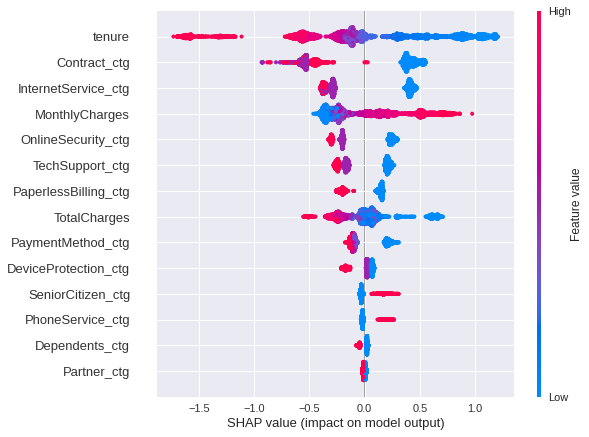

In [103]:
shap.summary_plot(shap_values, splits['X_train'][features])

In [106]:
pred = cb_clf.predict(splits['X_test'][features])

We are going to use Catboost internal grid search so after fitting now we have to set our params to perform the GS

In [75]:
param_grid = {
    'learning_rate': [0.02, 0.05, 0.08],
    'grow_policy': ['Depthwise'],
    'depth': [5,10,15,25],
    'random_seed': [10,40,60],
    'min_data_in_leaf': [2,5,10,20]
}

cb_clf_ht = CatBoostClassifier(task_type = 'GPU',
                            devices = '0:1',
                            eval_metric='Logloss',
                            custom_metric='AUC',
                            iterations=100,
                            )

cb_clf_ht.grid_search(param_grid=param_grid, X=training_pool, plot=True, cv=5)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.4405142	best: 0.4405142 (0)	total: 781ms	remaining: 1m 51s
1:	loss: 0.4405659	best: 0.4405142 (0)	total: 1.53s	remaining: 1m 48s
2:	loss: 0.4402668	best: 0.4402668 (2)	total: 2.18s	remaining: 1m 42s
3:	loss: 0.4521187	best: 0.4402668 (2)	total: 4.32s	remaining: 2m 31s
4:	loss: 0.4556910	best: 0.4402668 (2)	total: 6.63s	remaining: 3m 4s
5:	loss: 0.4528982	best: 0.4402668 (2)	total: 8.59s	remaining: 3m 17s
6:	loss: 0.4748603	best: 0.4402668 (2)	total: 14.7s	remaining: 4m 48s
7:	loss: 0.4800034	best: 0.4402668 (2)	total: 20.6s	remaining: 5m 49s
8:	loss: 0.4721898	best: 0.4402668 (2)	total: 25.8s	remaining: 6m 26s
9:	loss: 0.4410073	best: 0.4402668 (2)	total: 26.7s	remaining: 5m 57s
10:	loss: 0.4366759	best: 0.4366759 (10)	total: 27.5s	remaining: 5m 32s
11:	loss: 0.4391980	best: 0.4366759 (10)	total: 28.3s	remaining: 5m 11s
12:	loss: 0.4482755	best: 0.4366759 (10)	total: 30.6s	remaining: 5m 8s
13:	loss: 0.4503039	best: 0.4366759 (10)	total: 32.5s	remaining: 5m 1s
14:	loss: 0.450

{'params': {'min_data_in_leaf': 2,
  'depth': 5,
  'random_seed': 40,
  'learning_rate': 0.05,
  'grow_policy': 'Depthwise'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
 